<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-плошадь." data-toc-modified-id="Общая-плошадь.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая плошадь.</a></span></li><li><span><a href="#Цена." data-toc-modified-id="Цена.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>Цена.</strong></a></span></li><li><span><a href="#Число-комнат." data-toc-modified-id="Число-комнат.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><strong>Число комнат.</strong></a></span></li><li><span><a href="#Высота-потолков." data-toc-modified-id="Высота-потолков.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><strong>Высота потолков.</strong></a></span></li><li><span><a href="#Время-продажи." data-toc-modified-id="Время-продажи.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><strong>Время продажи.</strong></a></span></li><li><span><a href="#День-недели,-месяц,-год" data-toc-modified-id="День-недели,-месяц,-год-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span><strong>День недели, месяц, год</strong></a></span></li><li><span><a href="#Зависимость-цены-от-других-факторов" data-toc-modified-id="Зависимость-цены-от-других-факторов-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span><strong>Зависимость цены от других факторов</strong></a></span></li><li><span><a href="#Средня--цена-за-квадратный-метр-в-разных-населенных-пунктах" data-toc-modified-id="Средня--цена-за-квадратный-метр-в-разных-населенных-пунктах-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span><strong>Средня  цена за квадратный метр в разных населенных пунктах</strong></a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span><strong>Расстояние до центра</strong></a></span></li><li><span><a href="#Анализ-центральной-части" data-toc-modified-id="Анализ-центральной-части-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span><strong>Анализ центральной части</strong></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Для анализа предоставлена база данных с объявлениями о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014 - 2019гг. Необходимо установить параметры, которые помогут определять рыночную стоимость объекта. В частности, это позволит определять некорретные и подозрительные объявления, отслеживать аномалии. 



## Изучение данных из файла

Импортируем необходимые для проекта библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

Прочитаем данные и сохраним базу данных в переменной **df**. Чтобы провести предварительную оценку данных, посмотрим первые строки и общую информацию.

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option("display.max_columns", None)

display(df.sample(10))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12398,20,11990000.0,82.8,2019-03-04T00:00:00,3,2.75,24.0,25.6,9,NaN,False,False,28.5,1.0,Санкт-Петербург,33977.0,15076.0,0.0,NaN,0.0,NaN,NaN
14994,8,7440000.0,58.0,2015-02-17T00:00:00,1,2.70,10.0,23.0,4,NaN,False,False,17.0,0.0,Санкт-Петербург,37412.0,8370.0,1.0,392.0,2.0,359.0,1001.0
7357,11,5150000.0,62.0,2016-04-07T00:00:00,3,2.60,9.0,40.0,7,NaN,False,False,10.0,1.0,Санкт-Петербург,28713.0,11034.0,1.0,204.0,0.0,NaN,616.0
3515,0,4450000.0,48.1,2017-11-10T00:00:00,2,2.50,9.0,29.0,3,NaN,False,False,5.7,2.0,Санкт-Петербург,14846.0,8135.0,0.0,NaN,0.0,NaN,5.0
17113,11,8900000.0,70.0,2018-02-21T00:00:00,2,2.80,16.0,34.0,13,False,False,False,14.0,2.0,Санкт-Петербург,46411.0,15247.0,1.0,672.0,0.0,NaN,127.0
2869,6,16000000.0,73.0,2018-10-22T00:00:00,2,NaN,6.0,NaN,4,NaN,False,False,35.0,NaN,Санкт-Петербург,23756.0,3322.0,0.0,NaN,1.0,859.0,115.0
11848,16,3490000.0,67.9,2018-11-14T00:00:00,3,2.75,5.0,37.3,3,NaN,False,False,8.2,NaN,посёлок Щеглово,NaN,NaN,NaN,NaN,NaN,NaN,71.0
573,1,5026719.0,64.6,2015-07-15T00:00:00,2,2.75,23.0,31.9,9,NaN,False,False,15.5,0.0,Санкт-Петербург,21793.0,17121.0,0.0,NaN,1.0,31.0,594.0
12722,13,4300000.0,50.0,2017-09-26T00:00:00,2,NaN,9.0,27.4,4,NaN,False,False,8.3,NaN,Санкт-Петербург,42715.0,15218.0,2.0,334.0,0.0,NaN,119.0
1460,8,5500000.0,57.4,2018-03-06T00:00:00,2,2.70,9.0,32.0,7,NaN,False,False,10.0,1.0,Санкт-Петербург,13711.0,12507.0,0.0,NaN,0.0,NaN,256.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Вывод**

Таблица содержит 22 столбца разных форматов. Часть информации внесена пользователями, часть получена автоматически на основе картографических данных. Примерно в половине столбцов присутствуют пропуски. Нужно определить какие пропуски важны для дальнейшего анализа и постараться заполнить их. У части столбцов нужно изменить формат.


## Предобработка данных

### Работа с пропусками

Проанализируем по очереди столбцы, в которых присутствуют пропущенные значения. 

In [3]:
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим корреляцию между различными признаками. Используем это в дальнейшем для заполнения пропусков.

In [4]:
display(df.corr())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


**Высота потолков.**

Много пропусков. Существенной корреляции с какими-то другими числовыми характеристиками нет. Можно заполнить с использованием медианы, чтобы исключить влияние выбросов. 
Сгруппируем дополнительно по локации, чтобы оценить, отличается ли высота потолков по крайней мере между населенными пунктами с наибольшим количеством объявлений.


In [5]:
print(df.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['count', 'median']).sort_values(by=('count', 'ceiling_height'), ascending=False).round(2).head(10).copy())


                           count         median
                  ceiling_height ceiling_height
Санкт-Петербург            10104           2.70
Всеволожск                   272           2.70
Пушкин                       234           2.60
посёлок Шушары               217           2.63
Колпино                      203           2.50
посёлок Мурино               200           2.70
Гатчина                      149           2.55
Петергоф                     145           2.55
посёлок Парголово            137           2.64
Сестрорецк                   129           2.70


Отличия есть. Используем данное деление для заполнения пропусков, чтобы повысить точность. 

Могут быть одно или несколько объявлений по населенным пунктам, где нет возможности посчитать медиану. На этот случай заполним пропуски медианным значением по всей выборке.



In [6]:
median_height = df['ceiling_height'].median() #расчем медианы высоты потолков по всей выборке
print('Медианное значение высоты потолков по всей выборке:', median_height) 

df['ceiling_height'].fillna(value = df.groupby(['locality_name'])['ceiling_height'].transform('median'), inplace = True)

df['ceiling_height'] = df['ceiling_height'].fillna(median_height)

Медианное значение высоты потолков по всей выборке: 2.65


Проверим остались ли еще пропуски.

In [7]:
display('Пропуски в высоте потолков: ', df['ceiling_height'].isna().sum())

'Пропуски в высоте потолков: '

0

Пропуски отсутствуют.


**Количество этажей.**

Отсутствуют данные по 86 позициям.Сформируем выборку, чтобы визуально оценить какие-то закономерности.

In [8]:
display(df[df['floors_total'].isnull()].sample(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10880,5,11990000.0,147.70,2017-06-23T00:00:00,5,2.7,NaN,NaN,3,NaN,False,False,NaN,0.0,Санкт-Петербург,20160.0,3252.0,2.0,320.0,1.0,976.0,88.0
4140,4,10296437.0,100.30,2017-07-02T00:00:00,3,2.7,NaN,58.18,3,NaN,False,False,10.90,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,35.0
11389,3,4700000.0,55.20,2016-06-23T00:00:00,1,2.7,NaN,18.39,7,NaN,False,False,15.37,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,15.0
22656,4,4574160.0,64.50,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
19350,10,5249478.0,51.77,2018-11-04T00:00:00,2,2.7,NaN,22.00,6,NaN,False,False,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,111.0


Указание этажа отсутствует в квартирах разных районов, разной площади и т.п., т.е. какой-то закономерности не заметно.


Заполним медианным значением по аналогичной локации. При этом, если медиана меньше этажа, на котором находится квартира, то в качестве общего количества этажей укажем этаж квартиры. 

In [9]:

print(df.groupby('locality_name')['floors_total'].median().sample(10))

locality_name
посёлок Ропша                            2.0
деревня Разбегаево                       3.5
деревня Большие Колпаны                  5.0
деревня Рапполово                        2.0
село Паша                                3.5
посёлок городского типа Кузьмоловский    5.0
посёлок Возрождение                      4.0
деревня Заневка                          3.0
поселок городского типа Дубровка         4.0
поселок Пушное                           3.0
Name: floors_total, dtype: float64


Видим, что медианное значение отличается в зависимости от местоположения. 

Заполним пропуски медианой с учетом района. И поверим все ли прпуски заполнены.


In [10]:
df['floors_total'].fillna(value = df.groupby(['locality_name'])['floors_total'].transform('median'), inplace = True)
display(df['floors_total'].isna().sum())

1

Осталось одно пропущенное значение. Посчитаем его равным этажу, на котором находится квартира

In [11]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Проверим, нет ли случаев, что этаж квартиры выше, чем общая этажность здания.

In [12]:
print((df['floors_total'] < df['floor']).sum())

32


Есть несколько таких случаев. Вероятно, они появились из-за использования медианы для заполнения пропусков, хотя могли быть связаны и с неточностью при первоначальном заполнении.

Сравним данные в столбцах `floors_total` и `floor`. В случае, если этаж квартиры выше, чем этажность здания, будем считать, что количество этажей в здании равно этажу квартиры. Также сразу же поменяем тип данных на целочисленный, т.к. из-за расчета медианы могли появиться дробные значения.

In [13]:
def floors_adj(floor_total, floor): 
    if floor_total < floor:
        return pd.to_numeric(floor, downcast='integer')
    return pd.to_numeric(floor_total, downcast='integer')
    
df['floors_total'] = df.apply(lambda x: floors_adj(x['floors_total'], x['floor']), axis=1)  

Проверим корректность исправления этажей.

In [14]:
print((df['floors_total'] < df['floor']).sum())

0


Ошибок в этажах не осталось.

Приведем данные в столбце `floors_total`к целочисленному типу.

In [15]:
df['floors_total'] = df['floors_total'].astype(int)

**Апартаменты**

В данном столбце нулевые значения подразумеваются, т.к. это должен быть булев тип. Изменим тип данных на булев, это решит проблему.

In [16]:
df['is_apartment'] = df['is_apartment'].astype(bool)


**Жилая площадь и площадь кухни**

В этих столбцах примерно одинаковое количество пропусков.


Жилая площадь имеет высокую корреляцию с общей площадью (0,94) и чуть меньше с количеством комнат (0,85).
Наибольшая корреляция площади кухни с общей площадью, но и она не высокая (0,61).


Рассчитаем коэффициенты соотношения жилой площади и общей, а также площади кухни и общей площади. Добавим соответствующие столбцы `living_to_total` и `kitchen_to_total`.


In [17]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
display(df.sample(1)) #выведем контрольную строку

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
23205,6,5000000.0,60.0,2017-11-21T00:00:00,3,2.7,5,NaN,2,True,False,False,NaN,NaN,Санкт-Петербург,23196.0,4831.0,1.0,196.0,0.0,NaN,49.0,NaN,NaN


Т.к. не везде указаны площади кухни и жилая, то и в столбце с коэффициентами будут пропуски.

In [18]:
display(df['living_to_total'].isna().sum())
display(df['kitchen_to_total'].isna().sum())

1903

2278

Найдем медианное значение коэффициента в зависимости от количества комнат и заполним пропуски умножив соответствующий коэффициент на общую площадь.



In [19]:
print(df.groupby('rooms')['living_to_total'].median().sample(5))


rooms
6     0.679412
10    0.653103
9     0.628251
8     0.688475
7     0.681670
Name: living_to_total, dtype: float64


In [20]:
df['living_to_total'].fillna(value = df.groupby(['rooms'])['living_to_total'].transform('median'), inplace = True)
df['kitchen_to_total'].fillna(value = df.groupby(['rooms'])['kitchen_to_total'].transform('median'), inplace = True)

display(df['living_to_total'].isna().sum())
display(df['kitchen_to_total'].isna().sum())



0

197

Осталось 197 значений с пропусками в `kitchen_to_total`. Оценим визуально строки, которые не заполнились.

In [21]:
display(df.query('kitchen_to_total != kitchen_to_total').head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.70,24,15.50,2,True,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0.574074,NaN
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.75,14,17.00,1,True,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.680000,NaN
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.70,17,24.75,4,True,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,0.912947,NaN
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.64,26,24.30,19,True,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,0.706395,NaN
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.63,10,NaN,7,True,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,0.689655,NaN


In [22]:
display(df[df.rooms==2].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.70,24,NaN,22,True,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.585009,0.263966
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.55,5,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0.704545,0.136364
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.60,5,30.0,5,True,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.166667


Это апартаменты не большой площади. В таких объектах часто бывает сложно отделить жилую площадь от кухни.

Коэффициент отношения площади кухни к общей не обязательно заполнять по всем строкам, т.к. эту информацию в дальнейшем мы не используем. Оставим пропуски.

Напишем функцию для заполнения жилой площади путем умножения общей площади на рассчитанный ранее коэффициент.

In [23]:
def area_adj(row):
    result = 0
    if row['living_area'] != row['living_area']:
        result = (row['total_area'] * row['living_to_total'])
        return result
    else:
        return row['living_area']
    
df['living_area'] = df.apply(area_adj, axis = 1)
display(df['living_area'].isna().sum()) # проверяем остались ли пустые значения
display(df.head(5))

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,True,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11,18.600,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5,34.300,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,100.435,9,True,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.631667,0.128571
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000,13,True,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


Площадь кухни заполнять не будем, т.к. эти данные не требуются в дальнейших расчетах.


**Балконы.**

Примерно в 50% случаев нет данных. Наиболее вероятно причина в том, что балконов нет. Заменим пропуски нулями.

In [24]:
df['balcony'] = df['balcony'].fillna(0)

**Местоположение**

Местоположение не указано в 49 случаях. Заполним пропуски маркером **"МАРКЕР"**

In [25]:
df['locality_name'] = df['locality_name'].fillna('МАРКЕР')

**Картографические данные**

Пропуски в столбцах с расстояниями и количеством парков и прудов сложно заполнить по какой-то логической схеме, т.к. они определяются автоматически. Можно предположить, что в случаях, если в данных столбцах нет значения, объектов поблизости нет, а расстояния довольно большие. Заменим все пропуски значениями-маркерами `888888`.

In [26]:
df.loc[:, 'airports_nearest': 'days_exposition'] = df.loc[:, 'airports_nearest': 'days_exposition'].fillna('888888')
   

Проверим остались ли пропуски.

In [27]:
display(df.isna().sum())


total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_to_total            0
kitchen_to_total         197
dtype: int64

Пропуски остались только в столбцах, связанных с площадью кухни. Эти столбцы не оказывают влияния на наш анализ.

### Изменение типа данных

Используем метод `info` для просмотра типов данных.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null object
cityCenters_nearest     23699 non-null object
parks_around3000        23699 non-null object
parks_nearest           23699 non-null object
ponds_around3000     

Заменим тип данных на более удобный для дальнейшей работы. Где это возможно, приведем к целочисленному типу, столбец с датой - к формату Дата-время.

In [29]:
df[['last_price', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']] = df[['last_price', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #меняем тип данных на datetime
df.round({'living_to_total': 3, 'kitchen_to_total': 3}) # округлим расчетные коэффициенты до трех знаков после запятой
display(df.sample(5))
#df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total
11058,8,4400000,45.5,2015-10-19,2,2.56,5,26.617916,3,True,False,False,NaN,0,Санкт-Петербург,21973,14703,0,888888,0,888888,837,0.585009,0.161075
21729,6,2000000,54.0,2018-02-01,2,2.50,3,31.590494,2,True,False,False,NaN,0,поселок Молодцово,888888,888888,888888,888888,888888,888888,44,0.585009,0.161075
20337,13,6750000,76.1,2016-11-30,3,2.75,16,44.000000,8,True,False,False,10.4,0,деревня Кудрово,888888,888888,888888,888888,888888,888888,508,0.578187,0.136662
2935,17,4145000,41.0,2016-04-16,1,2.70,20,20.000000,3,True,False,False,10.5,0,Санкт-Петербург,31293,11886,0,888888,0,888888,130,0.487805,0.256098
6076,3,9800000,79.0,2017-09-11,2,2.85,14,42.000000,5,True,False,False,13.0,2,Санкт-Петербург,11752,9659,1,725,0,888888,58,0.531646,0.164557


В таком виде данные более удобны для работы.

Проверим на наличие явных дубликатов.

In [30]:
duplicated_number = df.duplicated().sum()
print(duplicated_number)

0


Дубликаты отсутствуют.

На втором шаге проанализировали и заполнили пропуски в данных, скорректировали тип данных.

## Расчёты и добавление результатов в таблицу

Добавим в нашу таблицу несколько дополнительных столбцов, которые будут полезны в дальнейшем анализе.

Рассчитаем стоимость за квадратный метр, разделив общую стоимость на общую площадь.

In [31]:
df['price_per_square_meter'] = df['last_price'] /df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype(int) # приведем цену к целочисленному типу

Выделим из столбца с датой размещения объявления *день недели*, *месяц* и *год*.

In [32]:
df['week_day'] = df['first_day_exposition'].dt.weekday # выделяем день недели
#меняем номера дней недели на названия, для более удобного восприятия
df['week_day_name'] = df['week_day'].replace({0 : 'Понедельник', 1 : 'Вторник', 2 : 'Среда', 3 : 'Четверг',
                                               4 : 'Пятница', 5 : 'Суббота', 6 : 'Воскресенье'})
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month # выделяем месяц
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year # выделяем год

Сгруппируем информацию по этажам. Для этого отнесем все квартиры к одному из трех варинатов: *первый*, *последний* и *другой*.

In [33]:
def floor_group(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
df['floor_grouped'] = df.apply(floor_group, axis=1)

Выведем несколько строк, чтобы оценить добавленные столбцы.

In [34]:
display(df.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,week_day_name,month,year,floor_grouped
7415,0,6500000,67.0,2017-06-17,2,2.70,18,63.000000,18,True,False,False,NaN,0,Санкт-Петербург,18428,16134,1,739,1,758,298,0.940299,0.161075,97014,5,Суббота,6,2017,Последний
3162,7,6100000,72.0,2017-07-04,4,2.70,5,47.501299,3,True,False,False,NaN,0,Санкт-Петербург,31837,4765,2,281,1,1001,153,0.659740,0.112245,84722,1,Вторник,7,2017,Другой
9210,12,4950000,40.6,2017-04-01,1,2.70,25,15.000000,8,True,False,False,11.0,1,Санкт-Петербург,17673,14296,2,39,0,888888,402,0.369458,0.270936,121921,5,Суббота,4,2017,Другой
12307,16,10800000,69.0,2016-09-13,2,2.70,20,35.600000,7,True,False,False,12.3,0,Санкт-Петербург,39140,10364,2,173,3,196,327,0.515942,0.178261,156521,1,Вторник,9,2016,Другой
18543,9,4550000,88.7,2017-09-12,3,2.55,8,52.800000,5,True,False,False,10.8,1,городской посёлок Янино-1,888888,888888,888888,888888,888888,888888,142,0.595265,0.121759,51296,1,Вторник,9,2017,Другой
4060,0,1240000,30.0,2018-03-09,1,2.50,5,14.474640,2,True,False,False,NaN,0,Кингисепп,888888,888888,888888,888888,888888,888888,37,0.482488,0.247839,41333,4,Пятница,3,2018,Другой
4017,7,2268000,35.0,2017-12-21,1,2.70,9,14.000000,6,True,False,False,8.0,0,Санкт-Петербург,6450,17461,0,888888,1,444,25,0.400000,0.228571,64800,3,Четверг,12,2017,Другой
7012,10,3690000,48.2,2018-07-10,4,2.55,6,36.800000,4,True,False,False,5.4,0,Санкт-Петербург,13115,9397,0,888888,1,621,62,0.763485,0.112033,76556,1,Вторник,7,2018,Другой
22006,17,2950000,32.0,2018-09-09,1,2.50,5,19.000000,5,True,False,False,6.0,0,Санкт-Петербург,42573,15077,2,509,0,888888,46,0.593750,0.187500,92187,6,Воскресенье,9,2018,Последний
2973,0,4350000,42.0,2017-10-15,2,2.70,5,24.000000,5,True,False,False,7.0,0,Санкт-Петербург,27477,7744,0,888888,0,888888,174,0.571429,0.166667,103571,6,Воскресенье,10,2017,Последний


Добавили несколько столбцов, для части данных добавили дополнительные критерии, такие как "день недели" и "первый/последний" этаж. 

## Исследовательский анализ данных

Проанализируем имеющиеся данные по отдельным столбцам используя `describe`.


In [35]:
display(df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,month,year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21421.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23502.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.733548,10.680113,34.693060,5.892358,10.569807,0.591080,229926.326090,217889.797164,206966.331913,586032.987468,206966.453774,547394.651167,119467.665345,0.564917,0.187148,9.942121e+04,2.569307,6.400101,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,1.009407,6.592973,22.836079,4.885249,5.905438,0.959298,364234.172655,369789.067265,375686.524785,421119.826395,375686.457649,432160.451438,302961.361278,0.102745,0.071474,5.030681e+04,1.789082,3.491561,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.021583,0.025381,1.110000e+02,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.700000,2.000000,7.000000,0.000000,21183.000000,10927.000000,0.000000,601.000000,0.000000,637.000000,45.000000,0.491415,0.133333,7.658500e+04,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,33557.000000,14995.000000,1.000000,888888.000000,1.000000,888888.000000,124.000000,0.571429,0.170455,9.500000e+04,3.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.400000,8.000000,12.000000,1.000000,54176.000000,35152.000000,3.000000,888888.000000,3.000000,888888.000000,390.000000,0.633484,0.236192,1.142560e+05,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,430.133948,33.000000,112.000000,5.000000,888888.000000,888888.000000,888888.000000,888888.000000,888888.000000,888888.000000,888888.000000,1.000000,0.787879,1.907500e+06,6.000000,12.000000,2019.000000


### Общая плошадь. 

Разброс значений довольно большой: от 12 до 900 метров. Но площадь половины из всех квартир находится в диапазоне 40-70 квадратных метров. 

Используем гистограмму, чтобы оценить распределение визуально.

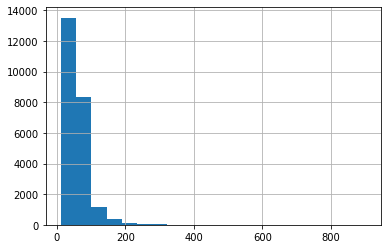

In [36]:
pd.Series(df['total_area']).hist(bins=20)

На гистограмме виден длинный "хвост" - есть существенно выбивающиеся из общего ряда значения. Возможно это ошибки или эксклюзивные отдельные варианты.

Построим boxplot, чтобы оценить разброс.

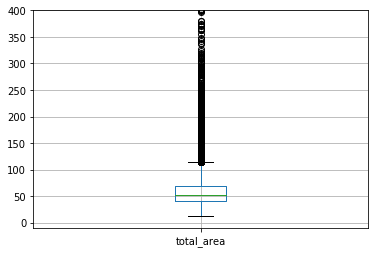

In [37]:
plt.ylim(-10, 400) 
df.boxplot(['total_area'])

Медиана проходит в районе 50. 

Посчитаем, сколько значений выпадает за пределы "усов".
Сохраним в переменной `total_area_adj` срез данных за исключением существенных отклонений (для определения границ воспользуемся "усами"). Посчитаем какой процент приходится на данные выбросы.

In [38]:
total_area_adj = df.query('total_area >14 & total_area <300')
print(len(total_area_adj['total_area']) / len(df['total_area']))

0.9970884847461918


Примерно 0,3% значений существенно выпадают. Не будем учитывать их в дальнейшем при анализе площади, для уменьшения искажений.

Построим гистограмму на основе скорректированного датафрейма `total_area_adj`.

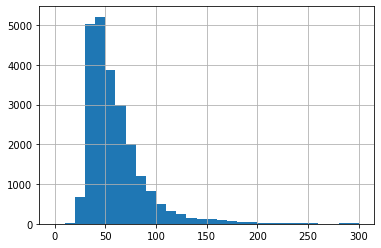

In [39]:
pd.Series(total_area_adj['total_area']).hist(bins=30, range = (0, 300))

В скорректированной выборке площадь основной части квартир находится примерно в том же диапазоне: 30-70 кв. Только нижняя граница немного спустилась за счет отсечения редких вариантов с очень большой площадью. 

### **Цена.** 

Проведем аналогичный анализ для цены.

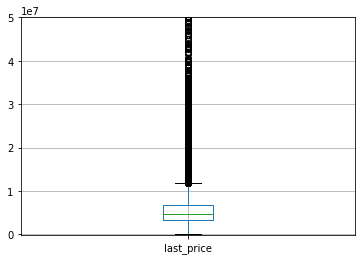

In [40]:
plt.ylim(-100000, 50000000)
df.boxplot(['last_price'])

Большая часть значений лежит в диапазоне от нуля до 12 млн. Посмотрим минимальные цены, воспользовавшись методом `sort_values`.


In [41]:
display(df.sort_values(by='last_price').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,week_day_name,month,year,floor_grouped
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,True,False,False,40.5,0,Санкт-Петербург,36421,9176,1,805,0,888888,8,0.293578,0.371560,111,2,Среда,3,2019,Последний
17456,7,430000,30.4,2019-04-22,1,2.50,2,16.000000,1,True,False,False,6.0,0,Сланцы,888888,888888,888888,888888,888888,888888,888888,0.526316,0.197368,14144,0,Понедельник,4,2019,Первый
14911,5,430000,54.0,2018-06-26,2,2.65,3,31.590494,3,True,False,False,NaN,0,посёлок станции Свирь,888888,888888,888888,888888,888888,888888,44,0.585009,0.161075,7962,1,Вторник,6,2018,Последний
16274,18,440000,40.0,2018-07-10,1,2.65,5,19.299520,1,True,False,False,NaN,0,деревня Старополье,888888,888888,888888,888888,888888,888888,45,0.482488,0.247839,11000,1,Вторник,7,2018,Первый
17676,0,450000,36.5,2018-02-01,1,2.65,5,17.300000,4,True,False,False,8.5,1,деревня Ям-Тесово,888888,888888,888888,888888,888888,888888,120,0.473973,0.232877,12328,3,Четверг,2,2018,Другой


Первая позиция явно не корректна. Возможно, цена указана в тыс.руб. Но, чтобы избежать искажений, исключим её из выборки. 

Посмотрим "хвост" распределения на гистограмме, используем диапазон вправо чуть больше, чем данные боксплота. 

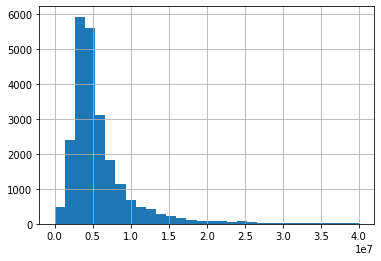

In [42]:
pd.Series(df['last_price']).hist(bins=30, range = (0, 40000000))

Довольно много значений находится правее границы в 12 000 000. При формировании выборки сдвинем верхнюю границу до 13 000 000. 

In [43]:
price_adj = total_area_adj.query('400000 < last_price <25000000') 

len(price_adj['last_price']) / len(total_area_adj['last_price'])

0.9815065594583157

In [44]:
price_adj['last_price'].describe().round(0)

count       23193.0
mean      5577110.0
std       3585201.0
min        430000.0
25%       3400000.0
50%       4600000.0
75%       6550000.0
max      24900000.0
Name: last_price, dtype: float64

Отсекли еще примерно 2 % значений. Все, кроме одного, отклонения были в большую сторону. Вероятно эти объекты могут обладать каким-то индивидуальными особенностями и не очень ценны для общего анализа. 

Распределение очень похоже на предыдущее - общей площади. Это не удивительно, т.к. между этими двумя параметрами наибольшая связь. 

### **Число комнат.** 

Воспользуемся информацией, полученной ранее из `describe`. Минимальное значение ноль, т.к. в выборке присутствуют студио и квартиры со свободной планировкой. Максимальное количество - 19. 

Построим гистограмму, чтобы оценить распределение.

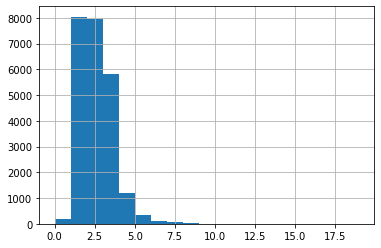

In [45]:
pd.Series(df['rooms']).hist(bins=19, range = (0, 19))

Основную долю занимают одно-трех комнатные квартиры. Варианты больше 6 комнат - исключения, их отбросим.

In [46]:
rooms_adj = price_adj.query('rooms <= 5')
len(rooms_adj['rooms']) / len(price_adj['rooms'])

0.9952140732117449

Более 99% квартир имеют до 5 комнат, что вполне логично.

### **Высота потолков.** 

Диапазон высоты потолков довольно широк: от 1 метра до 100. Крайние значения явно ошибочные. Построим гистограмму, посмотрим на распределение в диапазоне от 1 до 5 метров

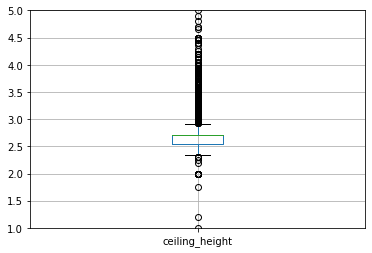

In [47]:
plt.ylim(1, 5)
df.boxplot(['ceiling_height'])

Большая часть значений укладывается в диапазон примерно 2,2-2,9 метра. Если увеличить верхнюю границу до 5 метров, сможем охватить практически все значения, за исключение совсем экзотических случаев или ошибок.

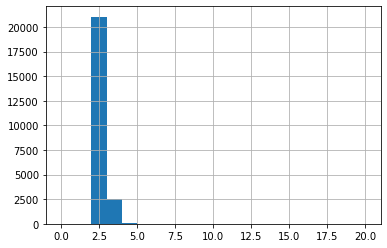

In [48]:
pd.Series(df['ceiling_height']).hist(bins=20, range = (0, 20))

Гистограмма наглядно подтверждает, что за пределы в 2-5 метров выпадают только очень редкие варианты. Построим гистограмму с использованием меньшего диапазона.

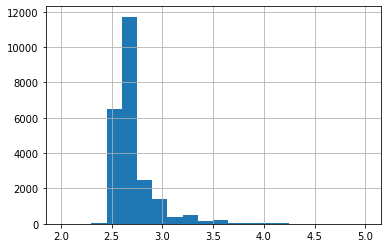

In [49]:
pd.Series(df['ceiling_height']).hist(bins=20, range = (2 , 5))

Можно заметить, потолки от 5 до 6 метров, как правило, в квартирах с большой площадью и высоким ценников. Т.е. наличие таких параметров вполне реально. В некоторых дореволюционных зданиях высота потоков могла быть в районе 2-х метров.

Следовательно, считаем корректными значения высоты потолков в диапазоне от 2.2 метров до 6.0 метров. Все, что выходит за пределы этого диапазона, нужно поправить. 


Добавим переменную `df_adj`, в которой сохраним данные, за исключением выбросов.

In [50]:
df_adj = rooms_adj.query('2.2 <= ceiling_height <= 5') 
print('Доля оставшихся после корректировки высоты потолков значений:', len(df_adj['ceiling_height']) / len(rooms_adj['ceiling_height'])) 
print('Доля оставшихся строк в скорректированной выборке:', len(df_adj) / len(df))

Доля оставшихся после корректировки высоты потолков значений: 0.9978771336972533
Доля оставшихся строк в скорректированной выборке: 0.9718975484197645


Выбросы составляли лишь небольшую часть выборки, практически все значение в пределах выбранного диапазона.

### **Время продажи.** 

Часть значений в этом столбце заполняли маркером. Исключим их и сохраним оставшуюся таблицу в переменно `days_exposition_adj`.

In [51]:
days_exposition_adj = df_adj.query('days_exposition != 888888')


Построим гистограмму, воспользовавшись резузльтатами `describe` для определения границ.

In [52]:
display(days_exposition_adj['days_exposition'].describe())

count    20030.000000
mean       178.256216
std        216.841574
min          1.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

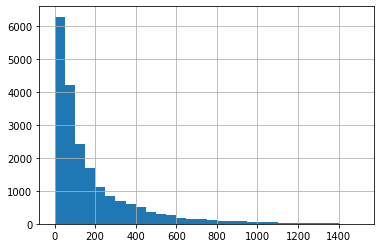

In [53]:
pd.Series(df['days_exposition']).hist(bins=30, range = (0, 1500))

Гистограмма рпедставляет собой распределение Пуассона: пик возле ноля и снижение переходящее в затяжной "хвост".

Среднее значение 180 дней, при этом медиана равна 95 дням. Из гистограммы и данных метада `describe` можно сделать вывод, что, если квартира не продается в первые три месяца, затем срок продажи существенно увеличивается. Примерно половина лотов продается в течение 3-х месяцев, а 75% в течение 7-8 месяцев. 


Оценим время экспозиции в привязке к местоположению.

In [54]:
print(days_exposition_adj.pivot_table(index='locality_name', values='days_exposition', aggfunc=['count', 'median']).sort_values(by=('count', 'days_exposition'), ascending=False).round(2).head(10))

                            count          median
                  days_exposition days_exposition
locality_name                                    
Санкт-Петербург             13182            93.0
посёлок Мурино                515            73.0
посёлок Шушары                408            92.0
Всеволожск                    339           123.0
Колпино                       307            74.0
посёлок Парголово             301            81.0
Пушкин                        301           130.0
деревня Кудрово               299            80.0
Гатчина                       267            99.0
Выборг                        206            99.5


Т.к. наибольшее количество предложений в Петербурге, ожидаемо медиана по данной локации совпадает с медианой по общей выборке. Но можно заметить, напрмер, что в поселке Мурино и в Колпино срок экспозиции существено меньше. При этом ни в одном из наиболее популярных районов срок экспозиции не приближается к величине третьего квартиля = 232 дня. Вероятно, в менее популярных налесенных пунктах срок существенно вырастает.

Посмотрим на распределение данных использую **boxplot**.

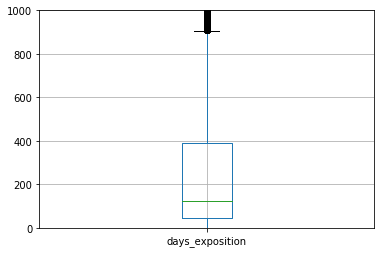

In [55]:
plt.ylim(0, 1000)
df.boxplot(['days_exposition'])

Нижняя граница совпадает с минимумом, т.е. равно 1 дню. Верхняя находится примерно в районе 900 дн.

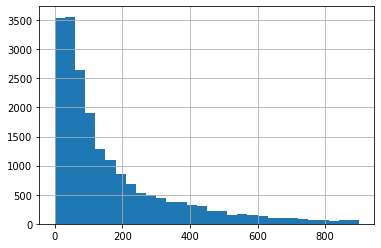

In [56]:
pd.Series(df['days_exposition']).hist(bins=30, range = (0, 900))

### **День недели, месяц, год**

Оценим ваимосвязь экспозиции с днем недели, когда объявление было размещено. 

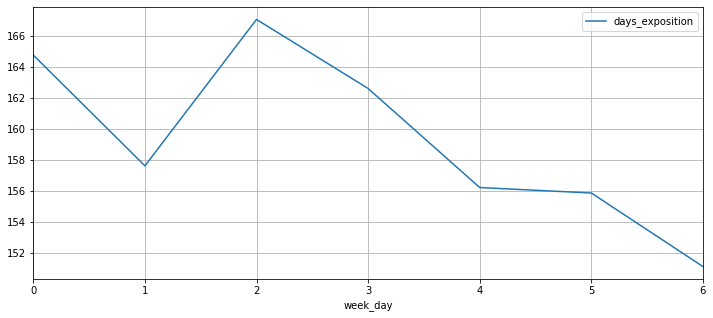

In [57]:
(
    df_adj.query('days_exposition != 888888 & days_exposition < 900')
    .pivot_table(index='week_day', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
) 

Меньше всего срок экспозиции у объявлений, размещенных в пятницу и выходные дни. Это может быть свящано с тем, что покупателям удобнее искать объявления и осматривать квартиры в свободне от работы время. Максимально время экспозии у квартир, размещенных с понедельника по четверг.

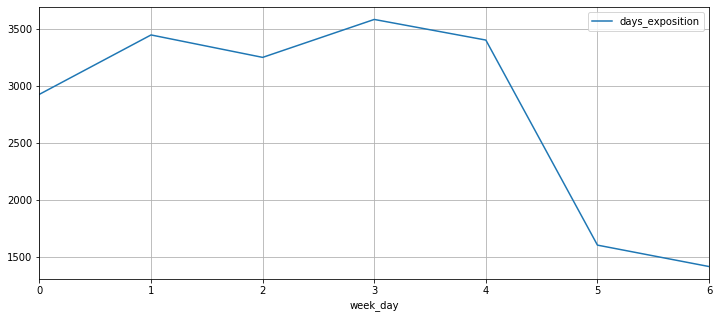

In [58]:
(
    df_adj.query('days_exposition != 888888 & days_exposition < 900')
    .pivot_table(index='week_day', values='days_exposition', aggfunc='count')
    .plot(grid=True, figsize=(12, 5))
) 

При этом видим, что наибольшее количество объявлений размещается как раз в будние дни. Возможно, в этом есть причинно следственная связь: в выходные размещается примерно в два раза меньше объявлений, поэтому они более популярны и это снижает срок экспозиции.

### **Зависимость цены от других факторов**

Посмотрим существуют ли зависимости между ценой и некоторыми из других характеристик.

1. Общая площадь. Расчитаем коэффициент корреляции между этими двумя параметрами.

In [59]:
print(total_area_adj['total_area'].corr(total_area_adj['last_price'])) # используем скорректированный датафрейм, в котором удаляли выбросы
print(df.query('total_area >40 & total_area <70')['total_area'].corr(df.query('total_area >40 & total_area <70')['last_price']))

0.6753094598085998
0.4108716749247961


Стоимость квартиры безусловно зависит от площади, корреляция в районе 0,7. Но это в большей степени заметно на больших площадях. Если оставить в выборке только значения общей площади между 25% и 75% процентилями, то зависимость опускается всего до 0,41.  

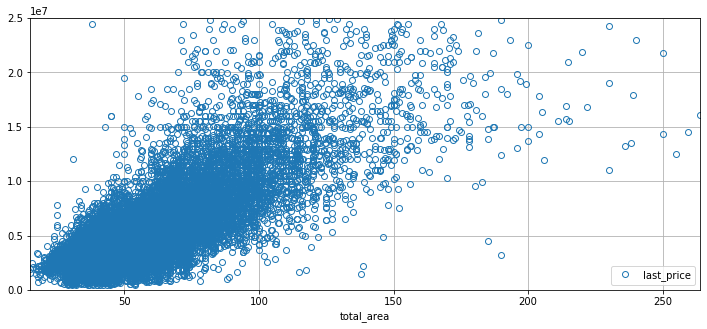

In [60]:
(
    df_adj.plot(x='total_area', y='last_price', markerfacecolor="None", style='o', ylim = (0, 25000000), grid=True, figsize=(12, 5))
) 

2. Число комнат.  

In [61]:
print(df_adj['rooms'].corr(df_adj['last_price'])) 

0.4884082873636489


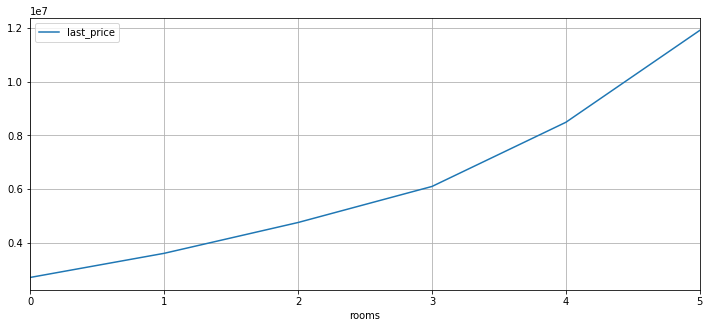

In [62]:
(
    df_adj.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 


Существенной связи между количеством комнат и ценой нет.

3. Удаленность от центра.  Используем в анализе только данные по которым есть информация о расстоянии до центра.

In [63]:
print(df_adj.query('cityCenters_nearest != 888888')['cityCenters_nearest'].corr(df_adj['last_price']))

-0.34669106761539625


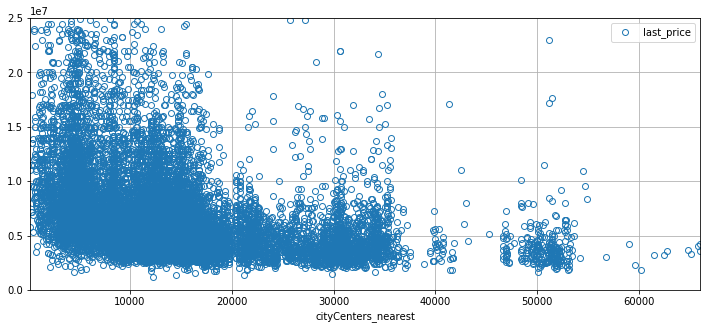

In [64]:
(
    df_adj.query('cityCenters_nearest != 888888').plot(x='cityCenters_nearest', y='last_price', markerfacecolor="None", style='o', ylim = (0, 25000000), grid=True, figsize=(12, 5))
) 

Зависимости практически нет. Это можно объяснить тем, что в центре города в Санкт-Петербурге старый жилов фонд, и близость к центру компенсируется ветхостью жилья. 

Также объекты в центре могут быть меньшей площади: цена за метр выше, но общая стоимость объекта ниже. А между ценой и площадью, как мы уже выяснили, наибольшая корреляция.

Оценим распределение площади в зависимости от удаленности от центра.

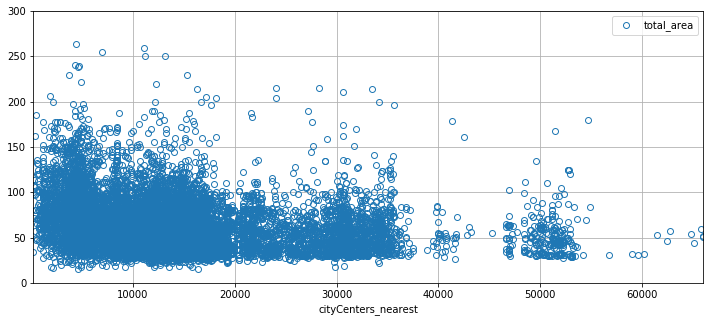

In [65]:
(
    df_adj.query('cityCenters_nearest != 888888')
    .plot(x='cityCenters_nearest', y='total_area', markerfacecolor="None", style='o', ylim = (0, 300), grid=True, figsize=(12, 5))
) 

Предположение, что в центре не большие по площади квартиры не подтвердилось. Скорее наоборот, ближе к центру побольше вариантов с большой площадью

4. Проанализируем зависимость цены от этажа.

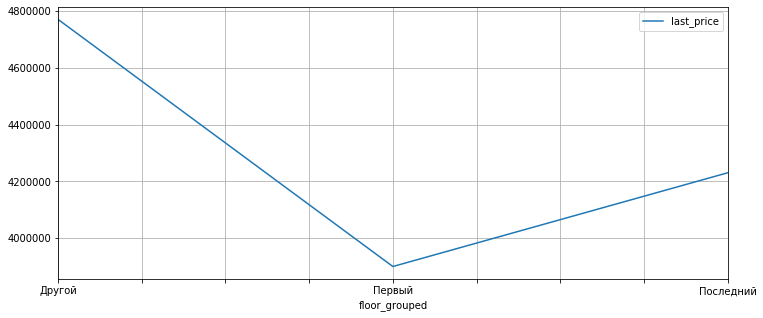

In [66]:
(
    df_adj.pivot_table(index='floor_grouped', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 


Для более корректного анализа посмотрим еще зависимость цены за квадратный метр от этажа.

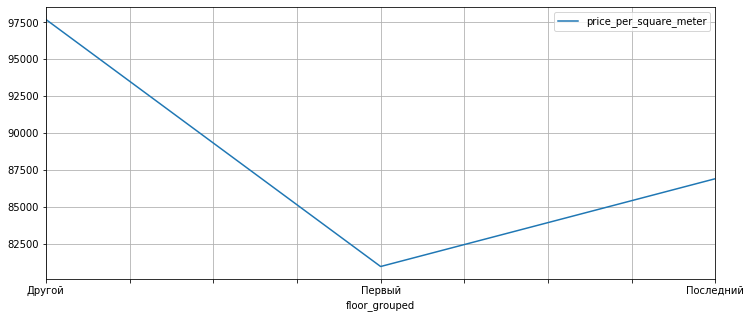

In [67]:
(
    df_adj.pivot_table(index='floor_grouped', values='price_per_square_meter', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

Обе зависимости дают схожий довольно ожидаемый результат: стоимость квартир на первом этаже самая низкая. Последние этажи подороже, но также ниже стоимсоти квартир на средних этажах.

5. День недели, месяц, год.
Посмотрим зависимоти между ценой и днем недели.

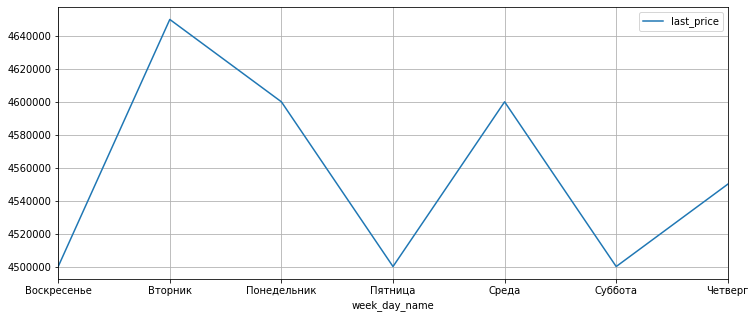

In [68]:
(
    df_adj.pivot_table(index='week_day_name', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

В пятницу, субботу и воскресенье появляются наиболее дешевые варианты. Это дает дополнительное обоснование выявленной ранее особенности: наименьшее время экспозиции у лотов, размещенных с пятницы по воскресение.

Посмотрим медианную цену по месяцам.

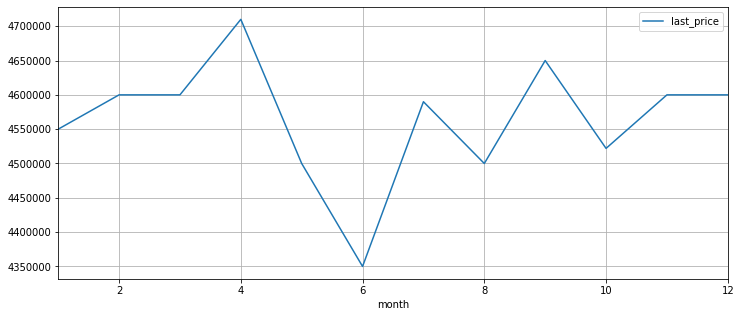

In [69]:
(
    df_adj.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

Оценим еще и количество объявлений в разбивке по месяцам.

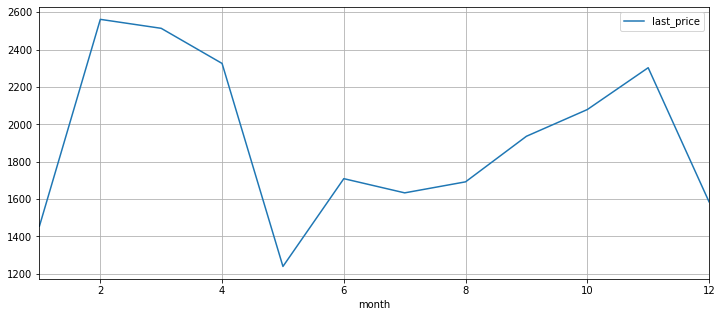

In [70]:
(
    df_adj.pivot_table(index='month', values='last_price', aggfunc='count')
    .plot(grid=True, figsize=(12, 5))
) 

Наиболее дорогие квартиры появляются в апреле. А в мае-июне появлялись в среднем наиболее дешевые варианты, причем и количество объявлений существенно падает. Летом, как правило, на рынке недвижимости не очень высокая активность. Возможно, для более быстрой продажи приходится опускать цену ниже средней по рынку. 

Построим график распределения цены по годам.

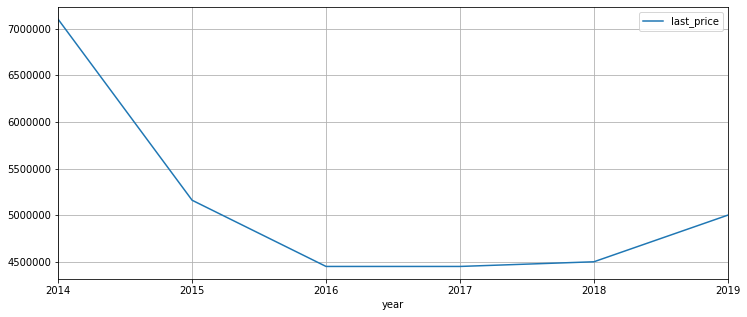

In [71]:
(
    df_adj.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

Стоимость квартир очень сильно упала с 2014 по 2016 года. В 2016-2017 годах практически не менялась, а с 2018 начался рост. Но даже после этого уровень цен примерно достиг 2015 года, и всё еще существенно ниже 2014. 

In [72]:
print(df_adj['week_day'].corr(df_adj['last_price']))
print(df_adj['month'].corr(df_adj['last_price']))
print(df_adj['year'].corr(df_adj['last_price']))

-0.014105795004763534
0.003372305103457507
-0.03303543027518726


Но если посмотреть корреляцию между оценеными выше показателями, то видим, что она близка к нулю.

### **Средня  цена за квадратный метр в разных населенных пунктах**



In [73]:
locality_grouped = df_adj.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean']).sort_values(by=('count', 'price_per_square_meter'), ascending=False).round(2).head(10)
print(locality_grouped)

                                   count                   mean
                  price_per_square_meter price_per_square_meter
locality_name                                                  
Санкт-Петербург                    15096              109642.74
посёлок Мурино                       520               85724.78
посёлок Шушары                       440               78676.90
Всеволожск                           397               68718.85
Пушкин                               361              102239.86
Колпино                              337               75332.87
посёлок Парголово                    326               90331.84
Гатчина                              306               68757.23
деревня Кудрово                      299               92473.09
Выборг                               235               58237.72


Большая часть предложений, конечно же, в Санкт_Петербурге. Также популярны поселки Мурино и Шушары.

Отсортируем выборку по стоимости за квадратный метр.

In [74]:
print(locality_grouped.sort_values(by=('mean', 'price_per_square_meter'), ascending=False).head(10))

                                   count                   mean
                  price_per_square_meter price_per_square_meter
locality_name                                                  
Санкт-Петербург                    15096              109642.74
Пушкин                               361              102239.86
деревня Кудрово                      299               92473.09
посёлок Парголово                    326               90331.84
посёлок Мурино                       520               85724.78
посёлок Шушары                       440               78676.90
Колпино                              337               75332.87
Гатчина                              306               68757.23
Всеволожск                           397               68718.85
Выборг                               235               58237.72


И снова ожидаемо Петербург на первом месте. Но совсем немного от него отстает Пушкин. Самые низкие цены за квадратный метр из десяти наиболее популярных населенных пунктов в Выборге - примерно в два раза ниже Санкт-Петербурга. 

### **Расстояние до центра**

Добавим столбец, в котором укажем округленное до километров расстояние до центра и посчитаем среднюю цену для каждого отрезка.

In [75]:
df_spb = df_adj.query('locality_name == "Санкт-Петербург" & cityCenters_nearest != 888888' ).copy()
df_spb['dist_to_center'] = (df_spb['cityCenters_nearest'] / 1000).round()
print(df_spb.groupby('dist_to_center')['price_per_square_meter'].mean().head(5))


dist_to_center
0.0    118152.857143
1.0    131204.098039
2.0    128596.887597
3.0    115341.644444
4.0    123332.747573
Name: price_per_square_meter, dtype: float64


Воспользуемся `describe` , чтобы определить верхнюю и нижнюю границы ценового диапазоня для построения графика.

In [76]:
df_spb.groupby('dist_to_center')['price_per_square_meter'].mean().describe()

count        30.000000
mean     106861.852737
std       16256.273724
min       72952.666667
25%       94928.980942
50%      105825.698441
75%      121672.142296
max      132115.000000
Name: price_per_square_meter, dtype: float64

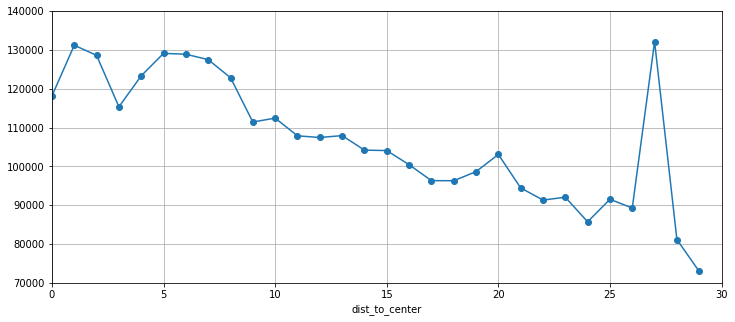

In [77]:

df_spb.groupby('dist_to_center')['price_per_square_meter'].mean().plot(x='dist_to_center', 
y='price_per_square_meter',
style='o-', 
xlim=(0, 30), 
ylim=(70000, 140000), 
figsize=(12, 5), 
grid=True) 


В качестве центральной части можно выделить зону в 10 км. Далее цена начинает снижаться.

На 27-м километре средняя цена очень выбивается из общей тенденции. Посмотрим отдельно на эти объекты.

In [78]:
df_spb.query('dist_to_center == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,week_day_name,month,year,floor_grouped,dist_to_center
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,True,False,False,25.0,0,Санкт-Петербург,23888,27313,1,1496,0,888888,128,0.405405,0.337838,193918,1,Вторник,11,2017,Другой,27.0
5961,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,True,False,False,7.0,0,Санкт-Петербург,24006,27431,0,888888,0,888888,178,0.515625,0.218750,70312,1,Вторник,2,2018,Последний,27.0


Здесь всего два объекта. При чем у одного цена как раз соответствует общему тренду - 70 т.р. за квадратный метр, а у второго очень выбивается - даже по сравнению с центральной частью. Возможно, это какой-то эксклюзивный объект (Двухкомнатная квартира площадью 74 кв.м с потолками 3,13м. - не частовстречающийся вариант)

### **Анализ центральной части**

Сохраним в переменной `df_spb_center` только объекты, находящиеся в радиусе 10 км от центра.

In [79]:
df_spb_center = df_spb.query('dist_to_center <= 3')
print('Объектов в центральной части:  {:.0f}'.format(len(df_spb_center)))


Объектов в центральной части:  740


Используем `describe` для просмотра основных параметров распределения и сравним с данными по всей выборке.

In [80]:
df_spb_center.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,month,year,dist_to_center
count,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,678.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,740.00,737.00,740.00,740.00,740.00,740.00,740.00
mean,10.28,9959103.65,83.17,2.80,3.04,4.91,50.66,3.06,13.56,0.09,22291.49,2301.70,1.47,205724.54,1.89,110827.95,151553.66,0.60,0.17,123295.92,2.61,6.42,2017.16,2.18
std,6.19,4342511.46,31.99,1.06,0.37,1.18,22.78,1.43,7.53,0.37,2033.12,856.73,1.06,374766.05,1.08,293368.39,334240.68,0.10,0.08,40165.18,1.74,3.52,1.12,0.82
min,0.00,2100000.00,16.00,0.00,2.50,2.00,9.00,1.00,3.50,0.00,17863.00,208.00,0.00,18.00,0.00,22.00,3.00,0.21,0.05,57961.00,0.00,1.00,2014.00,0.00
25%,6.00,6897500.00,60.26,2.00,2.70,4.00,34.00,2.00,8.88,0.00,20866.50,1639.75,1.00,311.25,1.00,153.75,72.75,0.54,0.12,95691.75,1.00,3.00,2017.00,2.00
50%,10.00,8990000.00,78.75,3.00,3.00,5.00,47.00,3.00,11.00,0.00,22081.00,2378.00,1.00,480.50,2.00,342.50,189.00,0.61,0.15,114218.50,3.00,7.00,2017.00,2.00
75%,15.00,12300000.00,100.00,3.00,3.30,6.00,63.55,4.00,16.00,0.00,23402.50,3088.00,2.00,939.75,3.00,718.25,653.00,0.67,0.20,138059.00,4.00,10.00,2018.00,3.00
max,50.00,24500000.00,206.00,5.00,4.80,12.00,160.00,9.00,56.20,4.00,31729.00,3498.00,3.00,888888.00,3.00,888888.00,888888.00,0.89,0.56,387096.00,6.00,12.00,2019.00,3.00


In [81]:
df_adj['last_price'].describe().round() #вызовем повторно описание скорректировонной выборки df_adj, для сравнения

count       23033.0
mean      5528128.0
std       3502044.0
min        430000.0
25%       3400000.0
50%       4580000.0
75%       6500000.0
max      24900000.0
Name: last_price, dtype: float64

In [82]:
df_adj['price_per_square_meter'].describe().round()

count     23033.0
mean      95627.0
std       33952.0
min        7962.0
25%       76056.0
50%       94382.0
75%      112820.0
max      640422.0
Name: price_per_square_meter, dtype: float64

In [83]:
df_adj['total_area'].describe().round()

count    23033.0
mean        57.0
std         24.0
min         15.0
25%         40.0
50%         51.0
75%         68.0
max        264.0
Name: total_area, dtype: float64

В центре большой разброс по большинству параметров. Есть как дешевые объекты с очень маленькой площадью, так и квартиры существенно больше 100 метров. Стандартное отклонение довольно большое - 32 метра. 
Большинство квартир имеют 2-3 комнаты. Это немного больше по сравнению с наиболее часто встречающимися вариантами в общей выборке.

Отклонение по цене также немного больше в центре, примерно 4,3 млн против 3,5 в общем. При этом средняя цена в центре существенно больше: 10млн против 5,6 млн., также как и медианное значение: 9млн против 4,6 млн.р. 


In [84]:
display(df_spb_center.sort_values(by='price_per_square_meter').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,week_day_name,month,year,floor_grouped,dist_to_center
22038,10,11940000,206.0,2018-12-12,5,3.50,6,160.0,3,True,False,False,26.0,0,Санкт-Петербург,20123,1852,3,510,3,417,90,0.776699,0.126214,57961,2,Среда,12,2018,Другой,2.0
2271,15,7480000,120.4,2017-09-05,4,2.92,3,67.2,1,True,False,False,18.3,0,Санкт-Петербург,20030,2315,3,394,3,110,192,0.558140,0.151993,62126,1,Вторник,9,2017,Первый,2.0
7041,13,9700000,156.0,2016-09-13,4,3.30,7,79.0,5,True,False,False,13.3,0,Санкт-Петербург,23571,3113,0,888888,0,888888,884,0.506410,0.085256,62179,1,Вторник,9,2016,Другой,3.0
21497,10,9300000,147.8,2017-11-29,4,2.70,5,108.0,4,True,False,False,10.8,0,Санкт-Петербург,19904,1579,3,441,3,157,225,0.730717,0.073072,62922,2,Среда,11,2017,Другой,2.0
3719,8,3100000,48.8,2017-05-12,1,2.70,6,28.9,1,True,False,False,12.1,0,Санкт-Петербург,22774,3082,1,286,3,155,80,0.592213,0.247951,63524,4,Пятница,5,2017,Первый,3.0
18616,12,9700000,146.0,2015-09-18,4,3.37,3,104.0,2,True,False,False,11.5,0,Санкт-Петербург,21813,1970,3,431,2,75,886,0.712329,0.078767,66438,4,Пятница,9,2015,Другой,2.0
24,8,6500000,97.2,2015-10-31,2,2.70,3,46.5,1,True,False,False,19.6,0,Санкт-Петербург,20052,2336,3,411,3,124,265,0.478395,0.201646,66872,5,Суббота,10,2015,Первый,2.0
6973,14,4900000,73.0,2017-02-09,2,2.70,5,51.0,1,False,False,False,8.0,0,Санкт-Петербург,19162,3167,0,888888,3,332,51,0.698630,0.109589,67123,3,Четверг,2,2017,Первый,3.0
20741,18,6999000,104.0,2016-05-28,2,2.70,6,56.0,2,True,False,False,25.0,0,Санкт-Петербург,22606,3057,2,473,3,332,511,0.538462,0.240385,67298,5,Суббота,5,2016,Другой,3.0
2326,1,8500000,125.0,2017-09-28,4,3.50,6,95.0,3,True,False,False,8.0,0,Санкт-Петербург,20851,658,0,888888,2,251,12,0.760000,0.064000,68000,3,Четверг,9,2017,Другой,1.0


Видим, что первые 5 объектов существенно отличаются по цене за м.кв. Возможно, какая-то ошибка в данных.

In [85]:
df_spb_center.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_per_square_meter,week_day,month,year,dist_to_center
total_images,1.000000,0.208284,0.094990,0.046070,0.058517,0.043736,0.055090,0.071113,0.038764,-0.052827,-0.010747,0.148904,0.012969,0.002488,0.059911,-0.000855,-0.016769,-0.063850,0.086432,0.141262,-0.066061,0.072226,0.144541,-0.021811,-0.052100,0.224337,0.044895
last_price,0.208284,1.000000,0.680577,0.419474,0.198928,0.082414,0.590671,0.186371,-0.011350,-0.081683,-0.073885,0.435484,0.096924,0.088009,-0.138791,0.058144,-0.020280,0.010358,-0.059932,0.187298,0.050564,-0.071597,0.507485,-0.018289,-0.057108,-0.000365,-0.160913
total_area,0.094990,0.680577,1.000000,0.749874,0.136305,0.050352,0.924576,0.168908,-0.065082,-0.097742,-0.069893,0.403740,0.108627,0.018878,-0.060562,-0.028307,0.087987,-0.002498,-0.007558,0.123120,0.177597,-0.299055,-0.229927,-0.006458,-0.041113,-0.089975,-0.073629
rooms,0.046070,0.419474,0.749874,1.000000,0.054706,-0.007881,0.816000,0.122409,-0.063266,-0.136990,-0.063567,0.057893,0.030653,0.040725,-0.050787,-0.060354,0.085692,-0.020306,0.013616,0.065620,0.446361,-0.477848,-0.298427,-0.001598,-0.038289,-0.107346,-0.061878
ceiling_height,0.058517,0.198928,0.136305,0.054706,1.000000,-0.033101,0.125973,-0.014085,-0.087630,0.024503,-0.026394,0.080897,0.022971,0.035171,-0.086986,0.020024,-0.017982,-0.029069,0.003229,0.071612,0.042598,-0.021514,0.126973,-0.053411,-0.008827,0.043743,-0.073314
floors_total,0.043736,0.082414,0.050352,-0.007881,-0.033101,1.000000,0.006459,0.326966,-0.026973,-0.018197,0.026098,0.106032,0.137719,0.113511,0.202509,0.035896,-0.010227,-0.166908,0.094928,0.068075,-0.110067,0.096827,0.051439,0.014008,-0.039261,0.030424,0.180429
living_area,0.055090,0.590671,0.924576,0.816000,0.125973,0.006459,1.000000,0.152929,-0.060235,-0.076982,-0.046107,0.129276,0.061473,0.026521,-0.059696,-0.037807,0.092598,0.007741,-0.008584,0.099431,0.511563,-0.494452,-0.247966,0.006220,-0.032319,-0.091060,-0.060502
floor,0.071113,0.186371,0.168908,0.122409,-0.014085,0.326966,0.152929,1.000000,-0.030119,-0.056730,-0.056730,0.076897,0.084270,0.038051,0.083072,-0.005040,0.017540,-0.127451,0.038796,0.076696,0.028597,-0.051298,0.042611,0.066769,-0.017886,0.036058,0.057494
is_apartment,0.038764,-0.011350,-0.065082,-0.063266,-0.087630,-0.026973,-0.060235,-0.030119,1.000000,0.018503,-0.063980,-0.030051,-0.130809,0.039468,0.045188,0.052424,-0.079457,-0.000337,0.004183,0.058409,-0.006289,0.008263,0.068461,-0.001020,0.123112,0.200117,0.047054
studio,-0.052827,-0.081683,-0.097742,-0.136990,0.024503,-0.018197,-0.076982,-0.056730,0.018503,1.000000,-0.002710,NaN,-0.013167,-0.021715,0.033704,-0.047792,0.033194,-0.066833,0.059288,-0.023613,0.067736,NaN,0.016578,0.011669,0.015943,0.038853,0.020203


**Число комнат.**

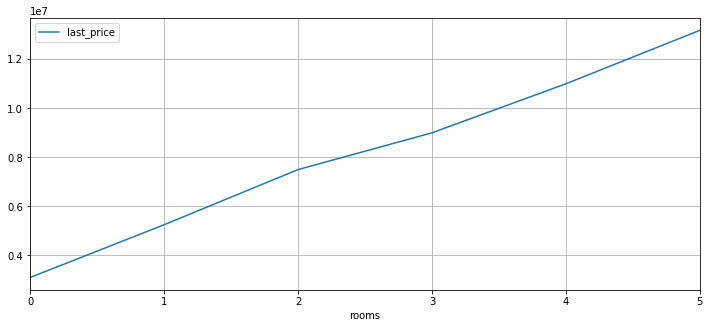

In [86]:
(
    df_spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 


Примерно схожая с основной выборкой зависимость.

**Удаленность от центра.**

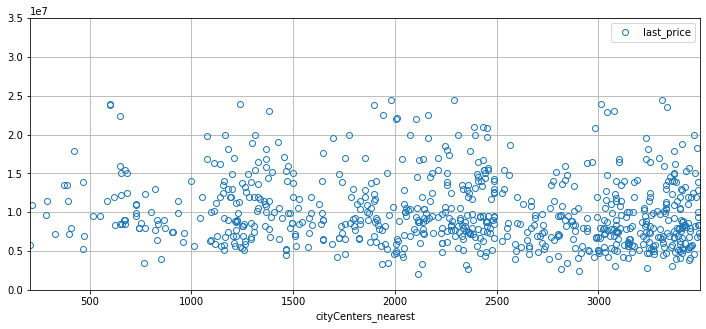

In [87]:
(
    df_spb_center.query('cityCenters_nearest != 888888').plot(x='cityCenters_nearest', y='last_price', markerfacecolor="None", style='o', ylim = (0, 35000000), grid=True, figsize=(12, 5))
) 

Если на полной выборке наблюдалась небольшая зависимость, то здесь её нет совсем.  Это объяснимо, т.к. 3км не столь большое расстояние, здесь уже речь идет скорее о более удобном расположении в рамках этой зоны, чем о максимальном приближении к центру. 

**Этаж**

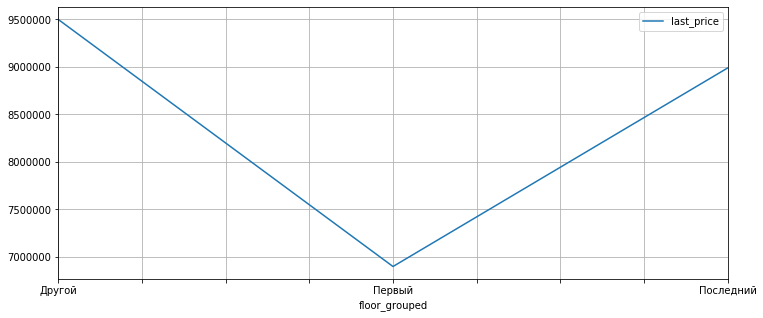

In [88]:
(
    df_spb_center.pivot_table(index='floor_grouped', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
) 

Первые этажи по прежнему предлагаются по наименьшей цене, а вот последние, в отличии от общей таблицы, уже не столь сильно отличаются от других. Хорошие виды играют свою роль.

**День недели/месяц/год**

Взаимосвязь с этими характеристиками, как мы уже выяснили, в большей степени случайна и изменчива. Отдельно делять визуализацию для центральной части не будем.

## Общий вывод

Проанализировали базу данных с объявлениями о продаже квартив в Санкт-Петербурге и окрестностях.


Основными факторами, влияющими на стоимость квартиры являются площадь и местоположение. 

Квартиры на первом и последнем этажах стоят дешевле. 

Объявления, размещенные с пятницы по воскресенье, имеют меньший срок экспозиции, но это может быть следствием того, что в эти дни размещались наиболее дешевые варианты.

Наиболее дорогие квартиры появляются в начае весны, к лету стоимость падает до минимума. Также весной увеличивается объем предложения.

После падения в 2014-2015 годах, цены к 2019 году так и не вернулись на свой уровень. 


При анализе объявлений для выявления аномалий стоит обращать внимание на отличие от медианных значений таких параметров, как:

- цена за кв.м. (94т.р. по общей выборке и 114т.р. по центральной части);
- общая цена объекта (4,6млн.р. по общей выборке и 9млн.р. по центральной части);
- площадь (51 кв.м. по общей выборке и 78,8кв.м. по центральной части) 

А также рссматривать сочетания указанных факторов между собой и в связке с местоположением.

Вызывают вопросы объекты с существенными отклонениями и неточностями: высотой потолков больше 5 или меньше двух метров, очень большой/маленькой площадью.

В идеале стремится к тому, чтобы свести количество пропусков в информации об объекте к минимуму. 
